<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with neural networks in TensorFlow

Regression problem: predicting a numerical variable based on some other variation of variables

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### Create data to view and fit

- features are usually defined in uppercase `X`, labels in lowercase `y`

Here we create a simple feature and label lists where the relationship is y (label) = feature (Y) + 10

Input shape: [8,] (8 numbers)
Output shape: [1,] (one number)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# create features
# x = np.array([-7., -4., -1., 2, 5., 8., 11., 14.])
X = np.array(range(-7, 15, 3)).astype(float)
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [12]:
# Create labels
y = np.array(range(3,25, 3)).astype(float)
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

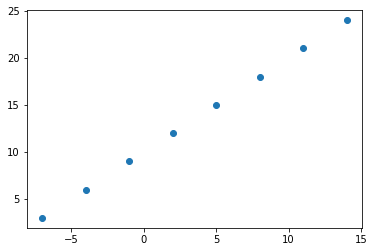

In [23]:
# Visualize
plt.scatter(X,y)

In [24]:
# this is the rule we want the neural network to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

Create a demo tensor for house pricing prediction problem (see main readme), where we already know the input / output shape from the info graphic and try to deduce the shapes for our X, y arrays.

In [26]:
house_info = tf.constant([3, 2, 1]) # 3 bedrooms, 2 bathrooms, 1 garage
house_price = tf.constant([939700])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

The house info contains just one item of shape 3, our `X` contains 8 of shape 1 (just one number), as does the desired output.

So the input shape is 1, as is the output shape for our simple example (that we have 8 items in those arrays doesn't matter for the input / output shape!)


In [33]:
print(X[0], "should predict", y[0])
print(X[1], "should predict", y[1])
print("etc...")

-7.0 should predict 3.0
-4.0 should predict 6.0
etc...


In [34]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

((), (), 0)

Why is there no shape?

Scalars (single numbers) are a rank 0 tensor (0 dimensions).

In the following code, we need to expand the dimensions of the input vector when fitting a model (automatic in TensorFlow up to 2.6, manual from 2.7 onward) to avoid a `shape error`:

```
## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated 
```

In [38]:
# turn arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [41]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

### Steps in modelling with TensorFlow

1. Creationg a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model
  - define the loss function (the function which tells the model how wrong it is) 
  - the optimizer (tells the model how to improve the patterns it is learning) 
  -evaluation metrics (what we can use to interpret the performance of the model)
3. Fitting a model - let the model try to find patterns between X and y (features and labels)